In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


['measurement', 'station']

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()

[('2017-08-23',)]

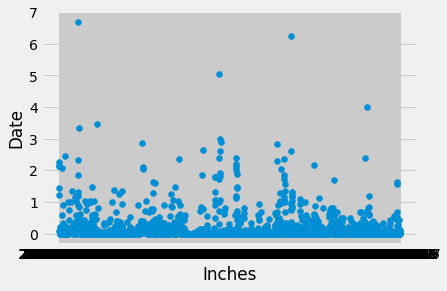

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt
# Calculate the date one year from the last date in data set.
date_12mo = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_12mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date_12mo).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_12mo_df = pd.DataFrame(data_12mo, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
data_sorted = data_12mo_df.sort_values(by=['Date']).set_index('Date')


# Use Pandas Plotting with Matplotlib to plot the data
plt.plot()
plt.scatter(x = data_12mo_df['Date'], y = data_12mo_df['Precipitation'])
plt.xlabel('Inches')
plt.ylabel('Date')
plt.show()


In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_sorted.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
uniq_stations = session.execute("SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY COUNT(station) DESC;")
i = 0
for val in uniq_stations:
    if i == 0:
        top_val = val[0]
    print(val)
    i+=1

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [84]:
top_val

'USC00519281'

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == top_val).all()

[(85.0, 54.0, 71.66378066378067)]

In [95]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(func.max(Measurement.date)).filter(Measurement.station == top_val).all()


[('2017-08-18',)]

In [97]:
max_date_12mo = dt.date(2017, 8, 18) - dt.timedelta(days=365)
active_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station==top_val).filter(Measurement.date > max_date_12mo).all()
active_data

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [98]:
#Save as DataFrame
active_df = pd.DataFrame(active_data, columns=['Date', 'Temperature'])

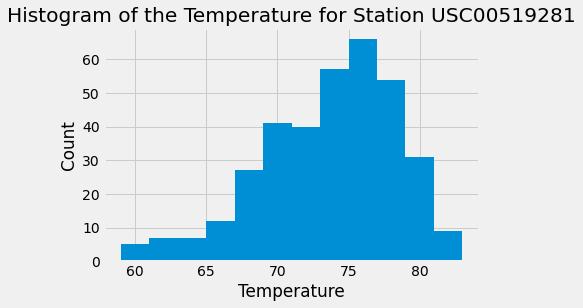

In [103]:
#Histogram Plot
plt.hist(active_df['Temperature'], bins=12)
plt.title(f"Histogram of the Temperature for Station {top_val}")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()